<center>
    <img style="height:100px;" src="https://www.credible.com/blog/wp-content/uploads/2019/10/banks-that-offer-personal-loans.png"  alt="Jupyter" />
</center>

<h1 align="center"><font size="5">Classification for Loan Prediction</font></h1>

In this project we are going to practice classification algorithms for Supervised Machine Learning.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Lets download the dataset


### Load Data From CSV File


In [2]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

In [4]:
#print(np.unique(df['education'].values))
#print(np.unique(df['loan_status'].values))
print(df.dtypes)

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object


In [5]:
df.groupby(['loan_status']).count()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,effective_date,due_date,age,education,Gender
loan_status,,,,,,,,,
COLLECTION,86,86,86,86,86,86,86,86,86
PAIDOFF,260,260,260,260,260,260,260,260,260


In [6]:
df.shape

(346, 10)

In [7]:
df.groupby(['loan_status'])['Gender'].value_counts()

loan_status  Gender
COLLECTION   male       79
             female      7
PAIDOFF      male      215
             female     45
Name: Gender, dtype: int64

### Convert to date time object


In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [9]:
print(df.dtypes)

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object


# Data visualization and pre-processing


Let’s see how many of each class is in our data set 


In [10]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


In [11]:
np.linspace(df.Principal.min(), df.Principal.max(), 10)

array([ 300.        ,  377.77777778,  455.55555556,  533.33333333,
        611.11111111,  688.88888889,  766.66666667,  844.44444444,
        922.22222222, 1000.        ])

Lets plot some columns to understand data better:


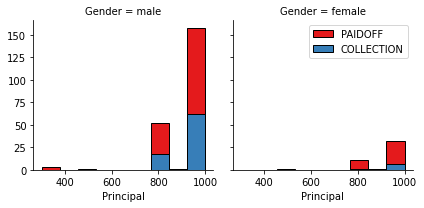

In [12]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

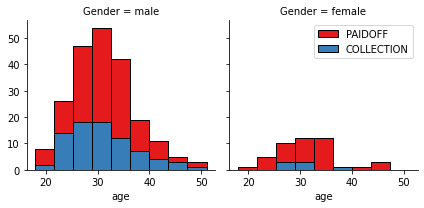

In [13]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at the day of the week people get the loan


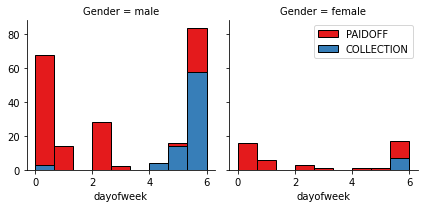

In [14]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 


In [15]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Lets look at gender:


In [16]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [17]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [18]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding


In [19]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame


In [20]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection


Lets defind feature sets, X:


In [21]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [22]:
y = df['loan_status'].values
y = (y == 'PAIDOFF')*1
y[0:5]

array([1, 1, 1, 1, 1])

Let's check pair plots between all our variables and understand more about their relations

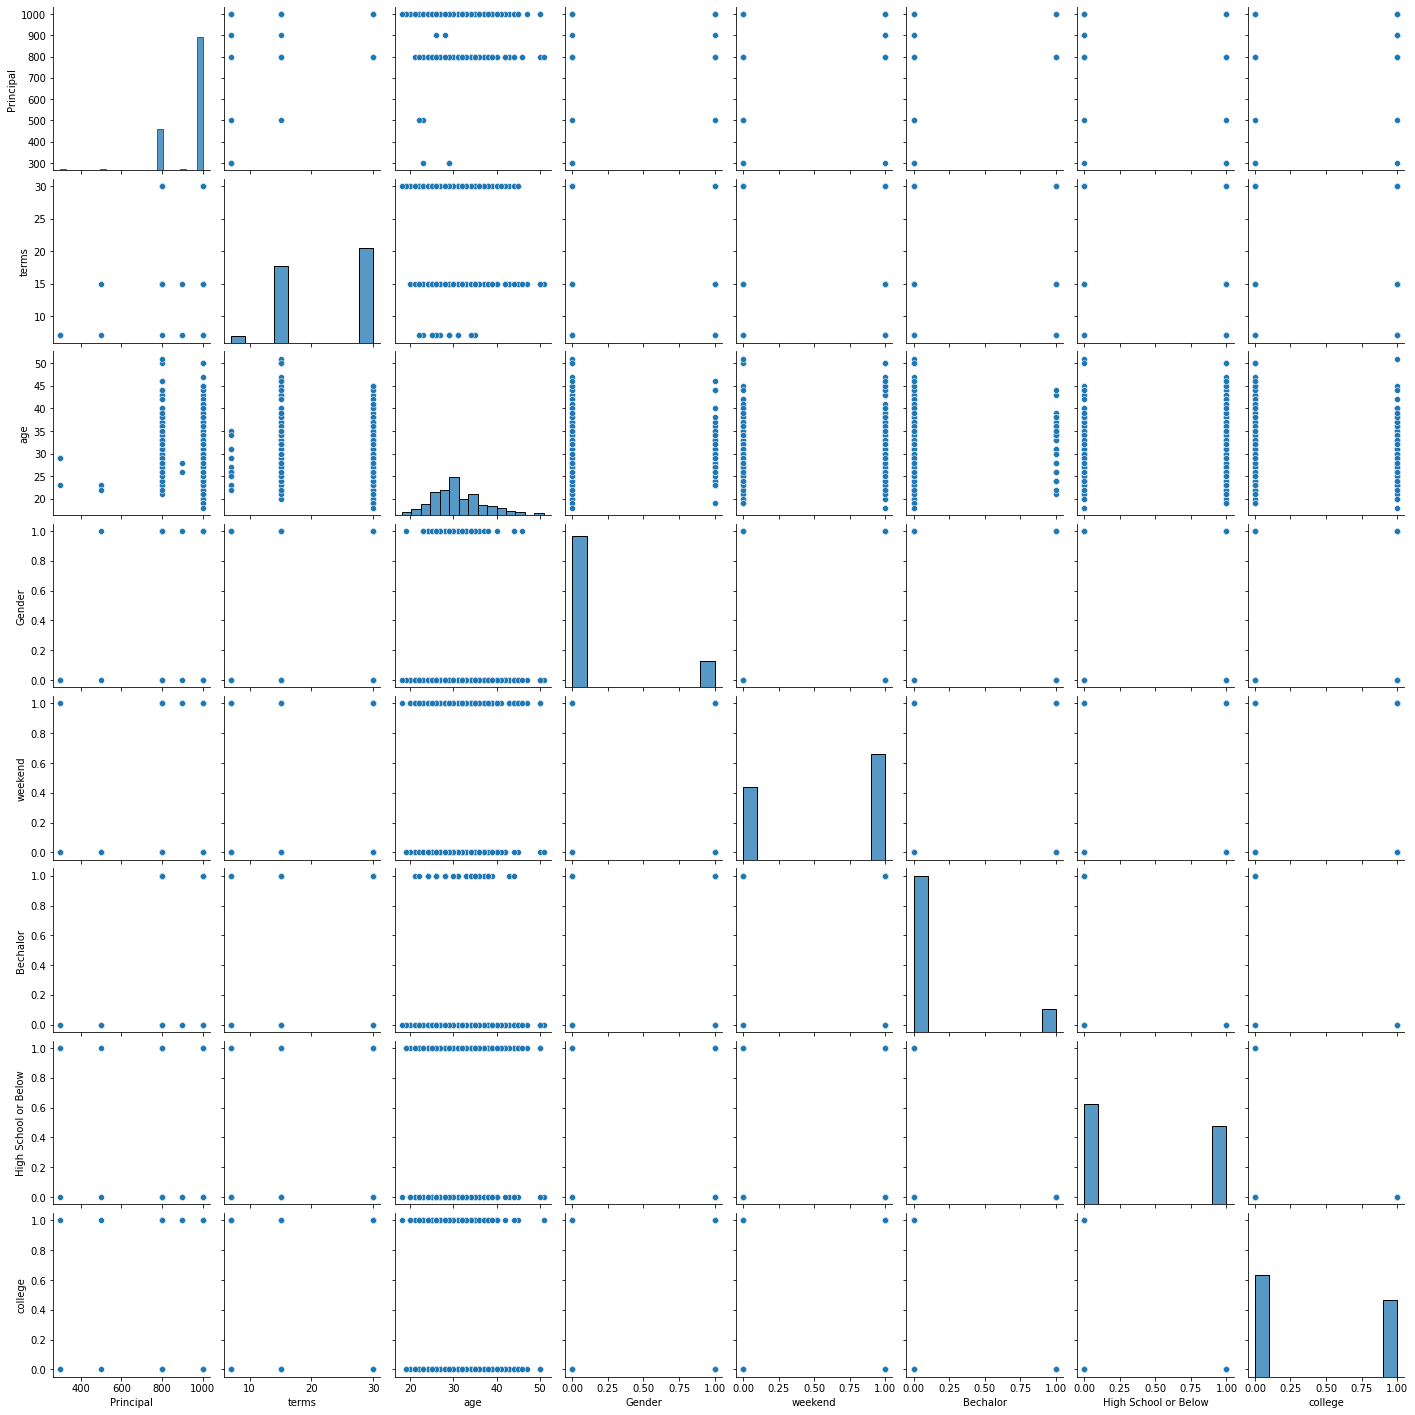

In [23]:
sns.pairplot(X)

In [24]:
X.corr().index

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')

Let's use a correlation matrix in a form of a heat map to see if there are positive or negative relations between the features of our dataset

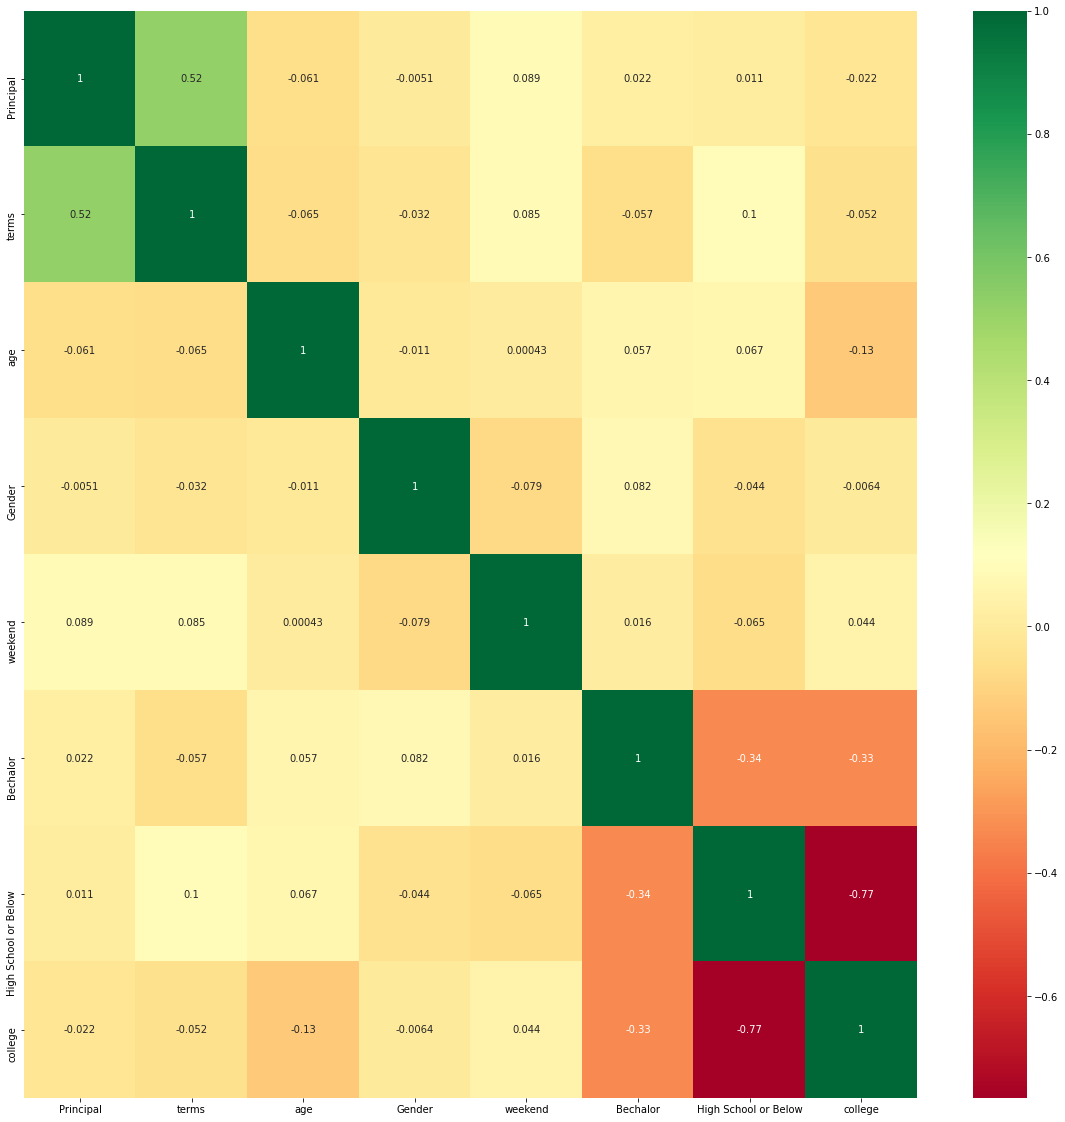

In [25]:
corrmat=X.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20)) #plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

In [27]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [28]:
print(model.feature_importances_)

[0.04066068 0.05896413 0.5192723  0.03431643 0.29389243 0.01872289
 0.01817344 0.01599769]


Plot graph of feature importances for better visualization

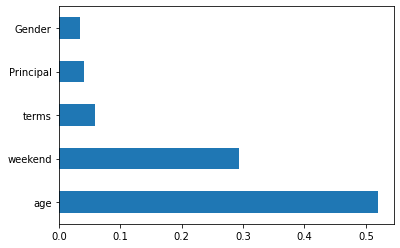

In [29]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split to prevent from data leakage)


In [30]:
#X = preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

def train_test_standardization():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)
    X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
    X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
    return X_train, X_test, y_train, y_test

# Classification


Now, it's time to use the training set to build an accurate model. We use the test set to report the accuracy of the model.
We are going to implement the following algorithms:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Random Forest
-   Support Vector Machine
-   Logistic Regression


# K Nearest Neighbor(KNN)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, jaccard_score, f1_score

In [32]:
X_train, X_test, y_train, y_test = train_test_standardization()

In [108]:
accuracies = np.empty(0)
jaccard_similarity_scores = np.empty(0)
f1_scores = np.empty(0)

for k in range(1,10):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_hat = knn_clf.predict(X_test)
    accuracies = np.append(accuracies, accuracy_score(y_test, y_hat))
    jaccard_similarity_scores = np.append(jaccard_similarity_scores, jaccard_score(y_test, y_hat))
    f1_scores = np.append(f1_scores, f1_score(y_test, y_hat, average='weighted'))

print(accuracies)
print("Best test accuracy is %f" % accuracies.max(), 'with k =', accuracies.argmax()+1, '\n')
print(jaccard_similarity_scores)
print("Best Jaccard Similarity Score is %f" % jaccard_similarity_scores.max(), 'with k =', jaccard_similarity_scores.argmax()+1, '\n')
print(f1_scores)
print("Best f1-score is %f" % f1_scores.max(), 'with k =', f1_scores.argmax()+1)

[0.67142857 0.64285714 0.72857143 0.65714286 0.71428571 0.65714286
 0.74285714 0.74285714 0.71428571]
Best test accuracy is 0.742857 with k = 7 

[0.640625   0.56896552 0.69354839 0.60655738 0.69230769 0.61290323
 0.72727273 0.7        0.70149254]
Best Jaccard Similarity Score is 0.727273 with k = 7 

[0.68707483 0.67481498 0.7414966  0.6851312  0.71428571 0.68285714
 0.7275882  0.75984078 0.69732022]
Best f1-score is 0.759841 with k = 8


### Using Cross Validation

In [109]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':range(1, 16),               
              'weights':['uniform', 'distance']}

knn_clf1 = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='accuracy') # same as scoring='accuracy'
knn_clf1.fit(X_train, y_train)
print("The best parameters obtained by CV:", knn_clf1.best_params_)
print("The best score obtained by CV = {:5.3f}".format(knn_clf1.best_score_))

#The best parameters by CV: {'n_neighbors': 7, 'weights': 'uniform'}
#The best score by CV = 0.723

The best parameters obtained by CV: {'n_neighbors': 5, 'weights': 'uniform'}
The best score obtained by CV = 0.750


In [110]:
accuracy_score(y_test, knn_clf1.predict(X_test))

0.7142857142857143

# Decision Tree


In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

accuracies = np.empty(0)
jaccard_similarity_scores = np.empty(0)
f1_scores = np.empty(0)

for max_depth in range(1,10):
    tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    tree_clf.fit(X_train, y_train)
    y_hat = tree_clf.predict(X_test)
    accuracies = np.append(accuracies, accuracy_score(y_test, y_hat))
    jaccard_similarity_scores = np.append(jaccard_similarity_scores, jaccard_score(y_test, y_hat))
    f1_scores = np.append(f1_scores, f1_score(y_test, y_hat, average='weighted'))

print(accuracies)
print("Best test accuracy is %f" % accuracies.max(), 'with depth =', accuracies.argmax()+1, '\n')
print(jaccard_similarity_scores)
print("Best Jaccard Similarity Score is %f" % jaccard_similarity_scores.max(), 'with depth =', jaccard_similarity_scores.argmax()+1, '\n')
print(f1_scores)
print("Best f1-score is %f" % f1_scores.max(), 'with depth =', f1_scores.argmax()+1)

[0.78571429 0.78571429 0.61428571 0.61428571 0.64285714 0.77142857
 0.75714286 0.75714286 0.65714286]
Best test accuracy is 0.785714 with depth = 1 

[0.78571429 0.78571429 0.57142857 0.57142857 0.58333333 0.76811594
 0.75362319 0.75362319 0.625     ]
Best Jaccard Similarity Score is 0.785714 with depth = 1 

[0.69142857 0.69142857 0.6445993  0.6445993  0.67418546 0.70647931
 0.69788107 0.69788107 0.67582418]
Best f1-score is 0.706479 with depth = 6


### Using Cross Validation

In [113]:
parameters = {'max_depth':range(1, 16),               
              'criterion':['gini', 'entropy']}

tree_clf2 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='accuracy') # same as scoring='accuracy'
tree_clf2.fit(X, y)
print("The best parameters by CV:", tree_clf2.best_params_)
print("The best score by CV = {:5.3f}".format(tree_clf2.best_score_))

The best parameters by CV: {'criterion': 'gini', 'max_depth': 1}
The best score by CV = 0.751


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

accuracies = np.empty(0)
jaccard_similarity_scores = np.empty(0)
f1_scores = np.empty(0)
n_estimators = [50, 100, 150, 200]

for n in n_estimators:
  rf_clf = RandomForestClassifier(n_estimators=n, random_state=4)
  rf_clf.fit(X_train, y_train)
  y_hat = rf_clf.predict(X_test)
  accuracies = np.append(accuracies, accuracy_score(y_test, y_hat))
  jaccard_similarity_scores = np.append(jaccard_similarity_scores, jaccard_score(y_test, y_hat))
  f1_scores = np.append(f1_scores, f1_score(y_test, y_hat, average='weighted'))

print(accuracies)
print("The best accuracy was %f" % accuracies.max(), "with n_estimators =", n_estimators[accuracies.argmax()])
print(jaccard_similarity_scores)
print("The best Jaccard Score was %f" % jaccard_similarity_scores.max(), "with n_estimators =", n_estimators[jaccard_similarity_scores.argmax()])
print(f1_scores)
print("The best f1-score was %f" % f1_scores.max(), "with n_estimators =", n_estimators[f1_scores.argmax()])


[0.7        0.7        0.7        0.71428571]
The best accuracy was 0.714286 with n_estimators = 200
[0.671875   0.67692308 0.67692308 0.69230769]
The best Jaccard Score was 0.692308 with n_estimators = 200
[0.70943076 0.70346256 0.70346256 0.71428571]
The best f1-score was 0.714286 with n_estimators = 200


### Using Cross Validation

In [116]:
num_features = round(X_train.shape[1]**0.5) # root squared number of features (/predictors) in X

In [117]:
parameters = {'n_estimators': [50, 100, 150, 200],               
              'criterion':['gini', 'entropy'],
              'max_features' : ['sqrt', 'log2', num_features, num_features-1, num_features+1]}

rf_clf5 = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='accuracy') # same as scoring='accuracy'
rf_clf5.fit(X, y)
print("The best parameters by CV:", rf_clf5.best_params_)
print("The best score by CV = {:5.3f}".format(rf_clf5.best_score_))

The best parameters by CV: {'criterion': 'gini', 'max_features': 3, 'n_estimators': 100}
The best score by CV = 0.694


# Support Vector Machine


In [118]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_standardization()

k_values = np.array(['linear', 'poly', 'rbf', 'sigmoid'])
accuracies = np.empty(0)
jaccard_similarity_scores = np.empty(0)
f1_scores = np.empty(0)

for k in k_values:       
    svc_clf = SVC(kernel=k, gamma='auto')
    svc_clf.fit(X_train, y_train)
    y_hat = svc_clf.predict(X_test)
    accuracies = np.append(accuracies, accuracy_score(y_test, y_hat))
    jaccard_similarity_scores = np.append(jaccard_similarity_scores, jaccard_score(y_test, y_hat))
    f1_scores = np.append(f1_scores, f1_score(y_test, y_hat, average='weighted'))

print(accuracies)
print("Best test accuracy is %f" % accuracies.max(), 'with kernel =', k_values[accuracies.argmax()], '\n')
print(jaccard_similarity_scores)
print("Best Jaccard Similarity Score is %f" % jaccard_similarity_scores.max(), 'with kernel =', k_values[jaccard_similarity_scores.argmax()], '\n')
print(f1_scores)
print("Best f1-score is %f" % f1_scores.max(), 'with kernel =', k_values[f1_scores.argmax()])

[0.78571429 0.74285714 0.74285714 0.72857143]
Best test accuracy is 0.785714 with kernel = linear 

[0.78571429 0.73913043 0.72727273 0.72463768]
Best Jaccard Similarity Score is 0.785714 with kernel = linear 

[0.69142857 0.68928571 0.7275882  0.68067227]
Best f1-score is 0.727588 with kernel = rbf


### Using Cross Validation



In [119]:
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

svc_clf3 = GridSearchCV(SVC(), parameters, cv=5, scoring='accuracy') # same as scoring='accuracy'
svc_clf3.fit(X, y)
print("The best parameters by CV:", svc_clf3.best_params_)
print("The best score by CV = {:5.3f}".format(svc_clf3.best_score_))

The best parameters by CV: {'kernel': 'poly'}
The best score by CV = 0.751


# Logistic Regression


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

solver_values = np.array(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
c_values = np.array([0.01, 0.1, 1, 10])        # regularization parameters
accuracies = np.empty(0)
jaccard_similarity_scores = np.empty(0)
f1_scores = np.empty(0)
log_losses = np.empty(0)
max_acc = 0
max_jss = 0
max_f1 = 0
min_logloss = 100

for s in solver_values:
    for c in c_values:
        logreg_clf = LogisticRegression(solver=s, C=c, max_iter=10000)
        logreg_clf.fit(X_train, y_train)
        y_hat = logreg_clf.predict(X_test)
        accuracies = np.append(accuracies, accuracy_score(y_test, y_hat))
        if(accuracy_score(y_test, y_hat)>max_acc):
            max_acc = accuracy_score(y_test, y_hat)
            best_solver_for_acc = s
            best_c_for_acc = c
        jaccard_similarity_scores = np.append(jaccard_similarity_scores, jaccard_score(y_test, y_hat))
        if(jaccard_score(y_test, y_hat)>max_jss):
            max_jss = accuracy_score(y_test, y_hat)
            best_solver_for_jss = s
            best_c_for_jss = c
        f1_scores = np.append(f1_scores, f1_score(y_test, y_hat, average='weighted'))
        if(f1_score(y_test, y_hat)>max_f1):
            max_f1 = f1_score(y_test, y_hat, average='weighted')
            best_solver_for_f1 = s
            best_c_for_f1 = c
        y_hat_prob = logreg_clf.predict_proba(X_test)
        log_losses = np.append(log_losses, log_loss(y_test, y_hat_prob))
        if(log_loss(y_test, y_hat_prob)<min_logloss):
            min_logloss = log_loss(y_test, y_hat_prob)
            best_solver_for_logloss = s
            best_c_for_logloss = c

print(accuracies)
print("Best test accuracy is %f" % accuracies.max(), 'with solver =', best_solver_for_acc, 'and c =', best_c_for_acc,'\n')
print(jaccard_similarity_scores)
print("Best Jaccard Similarity Score is %f" % jaccard_similarity_scores.max(), 'with solver =', best_solver_for_jss, 'and c =', best_c_for_jss,'\n')
print(f1_scores)
print("Best f1-score is %f" % f1_scores.max(), 'with solver =', best_solver_for_f1, 'and c =', best_c_for_f1,'\n')
print(log_losses)
print("Best log-loss is %f" % log_losses.min(), 'with solver =', best_solver_for_logloss, 'and c =', best_c_for_logloss)

[0.78571429 0.78571429 0.74285714 0.72857143 0.78571429 0.77142857
 0.75714286 0.72857143 0.78571429 0.75714286 0.74285714 0.72857143
 0.78571429 0.78571429 0.78571429 0.78571429 0.78571429 0.78571429
 0.78571429 0.78571429]
Best test accuracy is 0.785714 with solver = newton-cg and c = 0.01 

[0.78571429 0.78571429 0.73529412 0.72058824 0.78571429 0.77142857
 0.75       0.72058824 0.78571429 0.75714286 0.73529412 0.72058824
 0.78571429 0.78571429 0.78571429 0.78571429 0.78571429 0.78571429
 0.78571429 0.78571429]
Best Jaccard Similarity Score is 0.785714 with solver = newton-cg and c = 0.01 

[0.69142857 0.69142857 0.7048206  0.69538674 0.69142857 0.6843318
 0.71428571 0.69538674 0.69142857 0.67711963 0.7048206  0.69538674
 0.69142857 0.69142857 0.69142857 0.69142857 0.69142857 0.69142857
 0.69142857 0.69142857]
Best f1-score is 0.714286 with solver = saga and c = 10.0 

[0.53447448 0.49947083 0.49327616 0.5067065  0.54359813 0.50860411
 0.50532257 0.49782317 0.54355955 0.51124402 0.5

### Using Cross Validation



In [150]:
parameters = {'C':[0.01, 0.1, 1, 10],               
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

lr_clf4 = GridSearchCV(LogisticRegression(max_iter=10000), parameters, cv=5, scoring='accuracy') # same as scoring='accuracy'
lr_clf4.fit(X, y)
print("The best parameters by CV:", lr_clf4.best_params_)
print("The best score by CV = {:5.3f}".format(lr_clf4.best_score_))

C:\Users\PC-IDs\Anaconda3\envs\loanprediction\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\PC-IDs\Anaconda3\envs\loanprediction\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


The best parameters by CV: {'C': 0.01, 'solver': 'newton-cg'}
The best score by CV = 0.751


# Model Evaluation using Test set


In [33]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report


### Load Test set for evaluation


In [34]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [35]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

In [36]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [37]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x : 1 if (x > 3) else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [38]:
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature, pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(labels='Master or Above', axis=1, inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [39]:
X_test2 = test_Feature.values
X_test2 = preprocessing.StandardScaler().fit(X_test2).transform(X_test2)
y_test2 = (test_df['loan_status'] == 'PAIDOFF').values * 1

# Now we can use the entire original dataset to train models so we don't lose any valuable information

X_train2 = Feature.values
X_train2 = preprocessing.StandardScaler().fit(X_train2).transform(X_train2)
y_train2 = (df['loan_status'] == 'PAIDOFF').values * 1

## K Nearest Neighbor(KNN)

In [143]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train2, y_train2)
y_hat = knn_clf.predict(X_test2)
print("Jaccard Score =", jaccard_score(y_test2, y_hat))
print("F1-Score =", f1_score(y_test2, y_hat, average='weighted'))
print("Accuracy score =", accuracy_score(y_test2, y_hat))

Jaccard Score = 0.7142857142857143
F1-Score = 0.7253086419753088
Accuracy score = 0.7407407407407407


## Decision Tree

In [156]:
X_train2 = Feature.values
X_test2 = test_Feature.values

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth = 1)
tree_clf.fit(X_train2, y_train2)
y_hat = tree_clf.predict(X_test2)
print("Jaccard Score =", jaccard_score(y_test2, y_hat))
print("F1-Score =", f1_score(y_test2, y_hat, average='weighted'))
print("Accuracy score =", accuracy_score(y_test2, y_hat))      

Jaccard Score = 0.7407407407407407
F1-Score = 0.6304176516942475
Accuracy score = 0.7407407407407407


## Random Forest

In [84]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features=3, criterion='gini')
rf_clf.fit(X_train2, y_train2)
y_hat = rf_clf.predict(X_test2)
print("Jaccard Score =%f"% jaccard_score(y_test2, y_hat))
print("F1-Score =%f"% f1_score(y_test2, y_hat, average='weighted')) 
print("Accuracy score =%f"% accuracy_score(y_test2, y_hat))

Jaccard Score =0.708333
F1-Score =0.733931
Accuracy score =0.740741


In [133]:
import pickle

file = open('random_forest_classification_model.pkl', 'wb')
pickle.dump(rf_clf, file)
file.close()

## Support Vector Machine

In [147]:
X_train2 = preprocessing.StandardScaler().fit(X_train2).transform(X_train2)
X_test2 = preprocessing.StandardScaler().fit(X_test2).transform(X_test2)

svc_clf = SVC(kernel='poly', gamma='auto')
svc_clf.fit(X_train2, y_train2)
y_hat = svc_clf.predict(X_test2)
print("Jaccard Score =", jaccard_score(y_test2, y_hat))
print("F1-Score =", f1_score(y_test2, y_hat, average='weighted'))
print("Accuracy score =%f"% accuracy_score(y_test2, y_hat))

Jaccard Score = 0.7307692307692307
F1-Score = 0.683127572016461
Accuracy score =0.740741


## Logistic Regression

In [153]:
X_train2 = preprocessing.StandardScaler().fit(X_train2).transform(X_train2)
X_test2 = preprocessing.StandardScaler().fit(X_test2).transform(X_test2)

logreg_clf = LogisticRegression(solver='newton-cg', C=0.01, max_iter=10000)
logreg_clf.fit(X_train2, y_train2)
y_hat = logreg_clf.predict(X_test2)
print("Jaccard Score =", jaccard_score(y_test2, y_hat))
print("F1-Score =", f1_score(y_test2, y_hat, average='weighted'))
print("Log-loss =", log_loss(y_test2, logreg_clf.predict_proba(X_test2)))
print("Accuracy score =", accuracy_score(y_test2, y_hat))

Jaccard Score = 0.7407407407407407
F1-Score = 0.6304176516942475
Log-loss = 0.5153605391282532
Accuracy score = 0.7407407407407407


### Model Choice

Knowing the fact the dataset is quite imbalanced between the two targets classes (paidoff and collection), we are going to favor the model which has provided the best f1-score which is : Random Forest.

# Report

We can report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss | Accuracy |
| ------------------ | ------- | -------- | ------- | -------- |
| KNN                | 0.7143  | 0.7253   | NA      | 0.7407   |
| Decision Tree      | 0.7407  | 0.6304   | NA      | 0.7407   |
| Random Forest      | 0.7291  | 0.7492   | NA      | 0.7593   |
| SVM                | 0.7308  | 0.6831   | NA      | 0.7407   |
| LogisticRegression | 0.7407  | 0.6304   | 0.5154  | 0.7407   |
